# K-Nearest Neighbor(KNN) - Regressão
Algorítimo de classificação baseado na média dos visinhos mais próximos.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class KNNRegressao:
    
    def __init__(self, x, y, K=3):
        self.qt_amostras  = len(x)
        self.qt_atributos = len(x[0])
        self.x, self.y, self.K = x, y, K
        
    def predict(self, amostras):
        d = {}
        
        for i in range(self.qt_amostras):
            soma = 0
            
            for j in range(self.qt_atributos):
                soma += math.pow((self.x[i][j] - amostras[j]), 2)
            
            d[i] = math.sqrt(soma)
        
        k_vizinhos = sorted(d, key=d.get)[: self.K]
        
        return sum([self.y[idx] for idx in k_vizinhos]) / self.K

In [3]:
# Atributos de Entrada "Quantidade de Quartos" e "Metros Quadrados"
# Atributos de Saída   "Valor do Imóvel"
entradas = [[2, 50], [4,90], [1,38], [5,105], [2,48],
            [6,120], [3,65], [4,80], [5,100], [3,60]]
saidas   = [250, 490, 138, 505, 248, 612, 365, 480, 500, 360]

knn = KNNRegressao(entradas, saidas, 3)

In [4]:
# Realizando as previsões
previsao = []

for entrada in entradas:
    previsao.append(knn.predict(entrada))

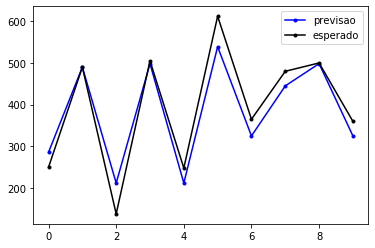

In [5]:
# Plotando as previsoes
# Gerando 10 valores com interavos iguais com a função linspace() do numpy
plt.plot( previsao, marker=".", label='previsao', c='blue' , linewidth=1.5)
plt.plot( saidas  , marker=".", label='esperado', c='black', linewidth=1.5)
plt.legend()
plt.show()

## kNN Regressão com sklearn
com Dataset load_boston com preço de casas em boston

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
boston.data.shape

(506, 13)

##### Colunas
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [9]:
# Todas as colunas
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# Importando o KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)

In [11]:
# Treinando o modelo
knn.fit(boston.data, boston.target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [12]:
# Avaliando uma previsão
previsao = knn.predict([boston.data[10]])
print(previsao)
print(boston.target[10])

[18.15555556]
15.0


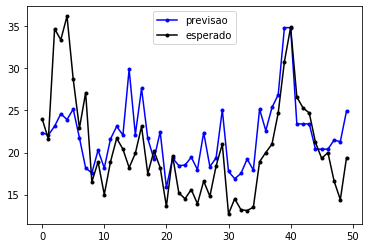

In [13]:
# Plotando as previsoes
previsoes = knn.predict(boston.data[:50])

plt.plot( previsoes         , marker=".", label='previsao', c='blue' , linewidth=1.5)
plt.plot( boston.target[:50], marker=".", label='esperado', c='black', linewidth=1.5)
plt.legend()
plt.show()

### Erro quadrático médio
Média do Quadrado das Diferenças entre o valor real e o valor predito

In [14]:
# Formula do Erro quadrado médio
import math

valor_real    = [3.0, -0.5, 2.0, 7.0]
valor_predito = [2.5, 0.0, 2.0, 8.0]

diferenca = [math.pow(valor_real[i] - valor_predito[i], 2) for i in range(len(valor_real))]
sum(diferenca)/len(valor_real)

0.375

In [15]:
# Utilizando o mean_squared_error
from sklearn.metrics import mean_squared_error

mean_squared_error(valor_real, valor_predito)

0.375

### Dataset load_diabetes

In [35]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [36]:
print(f'Quantidade de amostras dos dados de entrada - {len(diabetes.data)}')
print(f'Quantidade de amostras dos dados de saída   - {len(diabetes.target)}')

Quantidade de amostras dos dados de entrada - 442
Quantidade de amostras dos dados de saída   - 442


In [37]:
x, y = diabetes.data, diabetes.target

In [38]:
# dividindo em dados de treino e teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.3, random_state=42)

print(f'Quantidade de amostras dos dados de treino - {len(x_train)}')
print(f'Quantidade de amostras dos dados de teste  - {len(x_test)}')

Quantidade de amostras dos dados de treino - 309
Quantidade de amostras dos dados de teste  - 133


In [88]:
# Configurando o modelo KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20, p=2)
knn.fit(x_train, y_train)
previsoes = knn.predict(x_test)

In [89]:
# Verificando a amostra 4
print(f'Saída esperada {y_test[13]}')
print(f'Saída predita  {previsoes[13]}')

Saída esperada 297.0
Saída predita  196.85


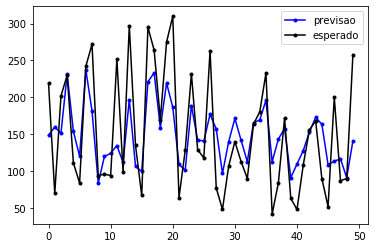

In [90]:
# Plotando as previsoes
plt.plot( previsoes[:50], marker=".", label='previsao', c='blue' , linewidth=1.5)
plt.plot( y_test[:50]   , marker=".", label='esperado', c='black', linewidth=1.5)
plt.legend()
plt.show()

In [91]:
# Calculando o Erro quadrático médio
mean_squared_error(y_test, previsoes)

2890.0918233082707